In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib.style 
import matplotlib as mpl 

2024-01-24 13:18:21.677227: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Load MNIST dataset
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

def MNIST_noise(y_noise, image):
    """
    Add random noise to a given image.

    Parameters:
    - y_noise (float): The maximum amplitude of the random noise.
    - image (numpy.ndarray): The input image to which noise will be added.

    Returns:
    - noisey_image (numpy.ndarray): The image with added random noise.
    """
    # Generate random noise with the same shape as the input image
    noise = np.random.uniform(0, y_noise, image.shape)

    # Add the generated noise to the input image
    noisey_image = image + noise

    return noisey_image

In [3]:
def noisey_images(images, y_noise):
    """
    Generates MNIST images with added random noise.

    Parameters:
    - images (numpy.ndarray): The input batch of images to which noise will be added.
    - y_noise (float): The maximum amplitude of the random noise.

    Returns:
    - noisey_images (numpy.ndarray): The batch of images with added random noise.
    """
    # Get the shape of the input images
    shape = images.shape

    # Initialize an array to store the noisy images
    noisey_images = np.zeros([shape[0], shape[1], shape[2]])

    # Iterate through each image in the batch
    for i in range(len(images)):
        # Add noise to the current image using the MNIST_noise function
        x = MNIST_noise(y_noise, images[i])
        
        # Accumulate the noisy image in the result array
        noisey_images[i] += x

    return noisey_images
        

In [4]:
#resizes intensity of pixels to a scale of 0-1
training_images=training_images/255.0
test_images=test_images/255.0


### Training our model with MNIST data and testing against images with a range of noise

In [7]:
#defining model with a 28x28 input, 128 hidden nodes and 10 outputs

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    
    keras.layers.Dense(128,activation='sigmoid'),
    
    keras.layers.Dense(10)])

In [8]:
#compiling model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

#training model using training images and corresponding labels
model.fit(training_images, training_labels,batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 1s 1ms/step - loss: 0.4151 - accuracy: 0.8835
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2046 - accuracy: 0.9399
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1523 - accuracy: 0.9558
Epoch 4/20
600/600 [==============================] - 1s 1ms/step - loss: 0.1209 - accuracy: 0.9649
Epoch 5/20
600/600 [==============================] - 1s 1ms/step - loss: 0.1012 - accuracy: 0.9704
Epoch 6/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0861 - accuracy: 0.9753
Epoch 7/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0750 - accuracy: 0.9783
Epoch 8/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0654 - accuracy: 0.9816
Epoch 9/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0579 - accuracy: 0.9834
Epoch 10/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0515 - accuracy: 0.9856

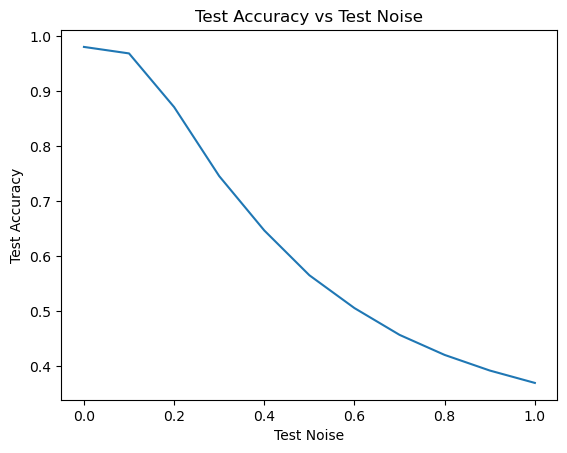

In [10]:
#10 noises values from 0-10
y_noises = np.linspace(0,1,11)

#empty array to append accuracies to
original_accuracies = []

#loop evalualting model at differant test noise values
for i in range(len(y_noises)):
    #adding noise
    noisey_test = noisey_images(test_images, y_noises[i])
    #evaluating model
    loss, accuracy = model.evaluate(noisey_test, test_labels, verbose=0)
    original_accuracies.append(accuracy)

    
    
#plotting graph of test accuracy vs test noise    
plt.plot(y_noises, original_accuracies)
plt.xlabel('Test Noise')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Test Noise')
plt.show()




### Training the model with noisey images 

In [11]:

#generating noisy trainin gimages
noisey_training_images = noisey_images(training_images,0.3)


#re-training model on noisy iamges
model.fit(noisey_training_images, training_labels,batch_size=100, epochs=20)



Epoch 1/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0371 - accuracy: 0.9894
Epoch 2/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0258 - accuracy: 0.9934
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9946
Epoch 4/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0188 - accuracy: 0.9965
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0165 - accuracy: 0.9972
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0149 - accuracy: 0.9978
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9983
Epoch 8/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0117 - accuracy: 0.9987
Epoch 9/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0104 - accuracy: 0.9991
Epoch 10/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0094 - accuracy: 0.9994

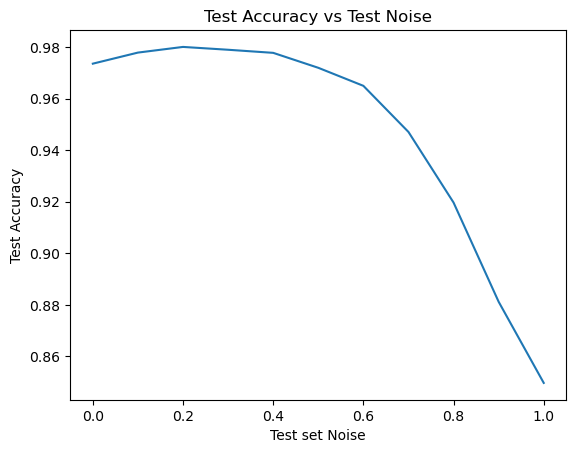

In [12]:
#empty array to append accuricies to
original_accuracies2 = []
#10 noises values from 0-10
y_noises = np.linspace(0,1,11)


#looping over noise values
for i in range(len(y_noises)):
    #generating noisy test images 
    noisey_test = noisey_images(test_images, y_noises[i])
    #evaulating model
    loss2, accuracy2 = model.evaluate(noisey_test, test_labels, verbose=0)
    #appending accuracies to array
    original_accuracies2.append(accuracy2)

#plotting figure    
plt.plot(y_noises, original_accuracies2)
plt.xlabel('Test set Noise')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Test Noise')
plt.show()



### Testing a range of training noise values against a range of testing sample noises

Epoch 1/3
600/600 [==============================] - 1s 1ms/step - loss: 0.4091 - accuracy: 0.8813
Epoch 2/3
600/600 [==============================] - 1s 2ms/step - loss: 0.2009 - accuracy: 0.9414
Epoch 3/3
600/600 [==============================] - 1s 1ms/step - loss: 0.1496 - accuracy: 0.9559
Epoch 1/3
600/600 [==============================] - 1s 1ms/step - loss: 0.4143 - accuracy: 0.8757
Epoch 2/3
600/600 [==============================] - 1s 1ms/step - loss: 0.2010 - accuracy: 0.9410
Epoch 3/3
600/600 [==============================] - 1s 1ms/step - loss: 0.1494 - accuracy: 0.9561
Epoch 1/3
600/600 [==============================] - 2s 2ms/step - loss: 0.4321 - accuracy: 0.8721
Epoch 2/3
600/600 [==============================] - 1s 2ms/step - loss: 0.2038 - accuracy: 0.9402
Epoch 3/3
600/600 [==============================] - 1s 1ms/step - loss: 0.1501 - accuracy: 0.9558
Epoch 1/3
600/600 [==============================] - 1s 1ms/step - loss: 0.4464 - accuracy: 0.8662
Epoch 2/3


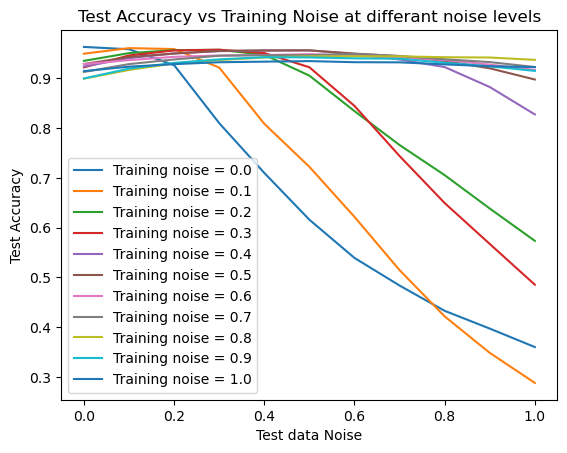

In [13]:
#range of training noises
train_noise = np.linspace(0,1,11)
#range of testing noises
y_noises = np.linspace(0,1,11)
#empty matrix to append accuracies
accuracies3 = np.zeros([len(y_noises), len(train_noise)])

#looping over training noises
for i in range(len(train_noise)):
    #generating noisey training images 
    noisey_training_images2 = noisey_images(training_images,train_noise[i])
    
    #defining a new model with 28x28 input, 128 hidden nodes and 10 outputs
    
    model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    
    keras.layers.Dense(128,activation='sigmoid'),
    
    keras.layers.Dense(10)])

    #compiling and training model to noisey training images 
    model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

    model3.fit(noisey_training_images2, training_labels,batch_size=100, epochs=3)
    
    #looping over test noises
    for j in range(len(y_noises)):
        #generating noisy test images
        noisey_test2 = noisey_images(test_images, y_noises[j])
        #evaluating model  
        loss3, accuracy3 = model3.evaluate(noisey_test2, test_labels, verbose=0)
        accuracies3[i,j] = (accuracy3)

    
    #plotting accuracies against testing noise for agiven training noise
    plt.plot(y_noises, accuracies3[i,:], label=f'Training noise = {round(train_noise[i],1)}')
    plt.xlabel('Test data Noise')
    plt.ylabel('Test Accuracy')
    plt.legend()

plt.title(f'Test Accuracy vs Training Noise at Differant Test Noise Levels')
plt.show() 
    
    

# Conclusions



Analysis of Performance Using Updated Data
Training with Low Noise (0.0 - 0.2):

Remarkably, the model trained with minimal noise (0.1) attains the highest maximum accuracy (98.1%) upon evaluation, surpassing even the accuracy achieved by the model trained on clean data (97.8%). This implies that a small amount of noise could potentially serve as a regularizer, enhancing the model's generalization capabilities. Training with a noise level of 0.2 results in a slightly reduced maximum accuracy compared to 0.1, yet still maintains high performance (97.5%), indicating resilience to some noise during evaluation.

Training with Moderate Noise (0.3 - 0.6):

As the noise level during training increases to moderate levels (0.3 - 0.6), there is a minor decrease in maximum accuracy, ranging from 97.3% to 97.0%. These models exhibit notable resilience to noise, showcasing competitive accuracies. The optimal evaluation noise tends to rise with increased training noise, suggesting adaptation to the noise characteristics they were trained on.

Training with High Noise (0.7 - 1.0):

At higher training noise levels (0.7 - 1.0), the maximum accuracy experiences a more pronounced decline, ranging from 96.5% to 95.2%. This may indicate the models' limitations in handling elevated noise levels. Despite the substantial noise during training, these models do not necessarily yield the best performance when evaluated with equivalent noise levels, as the optimal evaluation noise tends to be slightly lower than the training noise.

Insights from the Plot:
Resilience to Moderate Noise:

Models trained with moderate noise (0.3 - 0.6) maintain relatively stable accuracy as the evaluation noise increases, underscoring their robustness.

High Training Noise and Generalization:

Models trained with the highest noise levels (0.9 - 1.0) do not showcase the best performance, implying a threshold beyond which excessive noise may hinder the model's ability to generalize to new data.

Optimal Noise for Training:

Based on the data, a training noise level of 0.1 appears optimal for this dataset and model architecture. This level achieves the highest recorded maximum accuracy, suggesting that introducing a small amount of noise can enhance generalization without compromising accuracy. Notably, models trained with noise levels up to 0.6 still perform admirably, indicating that a range of noise levels can be considered for training if robustness to noise is a priority.

Overfitting to Training Noise:

Models trained with higher noise levels (0.7 - 1.0) might capture noise-specific patterns that do not generalize well to different data types. While they may exhibit reasonable accuracy with the noise levels they were trained on, these models are likely to perform poorly on clean data or noise distributions they haven't encountered.